In [1]:
import numpy as np
import os
from rdkit import Chem, RDConfig, rdBase
from rdkit.Chem import AllChem, ChemicalFeatures
import argparse

In [2]:
molsuppl = Chem.SDMolSupplier('./nmrshiftdb2withsignals.sd', removeHs = False)

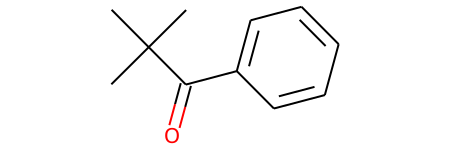

In [23]:
a

In [3]:
rdBase.DisableLog('rdApp.error') 
rdBase.DisableLog('rdApp.warning')
chem_feature_factory = ChemicalFeatures.BuildFeatureFactory(os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef'))


def get_atom_shifts_13C(mol):
    
    molprops = mol.GetPropsAsDict()
    
    atom_shifts = {}
    for key in molprops.keys():
    
        if key.startswith('Spectrum 13C'):
            
            for shift in molprops[key].split('|')[:-1]:
            
                [shift_val, _, shift_idx] = shift.split(';')
                shift_val, shift_idx = float(shift_val), int(shift_idx)
            
                if shift_idx not in atom_shifts: atom_shifts[shift_idx] = []
                atom_shifts[shift_idx].append(shift_val)

    return atom_shifts



def get_atom_shifts_1H(mol):
    
    molprops = mol.GetPropsAsDict()
    
    atom_shifts = {}
    for key in molprops.keys():
    
        if key.startswith('Spectrum 1H'):
            
            tmp_dict = {}

            for shift in molprops[key].split('|')[:-1]:
            
                [shift_val, _, shift_idx] = shift.split(';')
                shift_val, shift_idx = float(shift_val), int(shift_idx)
            
                if shift_idx not in tmp_dict: tmp_dict[shift_idx] = []
                tmp_dict[shift_idx].append(shift_val)
                

            for shift_idx in tmp_dict.keys():
                tmp_dict[shift_idx] = np.mean(tmp_dict[shift_idx])
                
                if shift_idx not in atom_shifts: atom_shifts[shift_idx] = []
                atom_shifts[shift_idx].append(tmp_dict[shift_idx])

            


    return atom_shifts


In [12]:
n_node_list=[]
n_heavy_node_list=[]
target='13C'
n_shifts_list=[]
idx_list = []

In [36]:
for i, mol in enumerate(molsuppl):
    try:
        Chem.SanitizeMol(mol)
        si = Chem.FindPotentialStereo(mol)
        for element in si:
            if str(element.type) == 'Atom_Tetrahedral' and str(element.specified) == 'Specified':
                mol.GetAtomWithIdx(element.centeredOn).SetProp('Chirality', str(element.descriptor))
            elif str(element.type) == 'Bond_Double' and str(element.specified) == 'Specified':
                mol.GetBondWithIdx(element.centeredOn).SetProp('Stereochemistry', str(element.descriptor))
        assert '.' not in Chem.MolToSmiles(mol)
    except:
        continue
    
    smiles = Chem.MolToSmiles(mol)
    if smiles == 'O=C(O)CCC':
        print('find!')
        break

In [13]:
for i, mol in enumerate(molsuppl):

    try:
        Chem.SanitizeMol(mol)
        si = Chem.FindPotentialStereo(mol)
        for element in si:
            if str(element.type) == 'Atom_Tetrahedral' and str(element.specified) == 'Specified':
                mol.GetAtomWithIdx(element.centeredOn).SetProp('Chirality', str(element.descriptor))
            elif str(element.type) == 'Bond_Double' and str(element.specified) == 'Specified':
                mol.GetBondWithIdx(element.centeredOn).SetProp('Stereochemistry', str(element.descriptor))
        assert '.' not in Chem.MolToSmiles(mol)
    except:
        continue

    if target == '13C': 
        atom_shifts = get_atom_shifts_13C(mol)
    elif target == '1H':
        atom_shifts = get_atom_shifts_1H(mol)


    
    if len(atom_shifts) == 0: continue
    
    
    
    mol_hrm = Chem.RemoveHs(mol)

    if 'H' in [at.GetSymbol() for at in mol_hrm.GetAtoms()]:
        continue

    
    n_shifts_list.append(len(atom_shifts))

    n_node = mol.GetNumAtoms()
    n_heavy_node = mol_hrm.GetNumAtoms()

    n_node_list.append(n_node)
    n_heavy_node_list.append(n_heavy_node)

    idx_list.append(i)

In [28]:
little_idx = np.where(np.array(n_heavy_node_list)<6)[0]
little_mols = np.array(idx_list)[little_idx]

In [38]:
Chem.MolToSmiles(molsuppl[711])

'[C]C([C])([C])[O]'

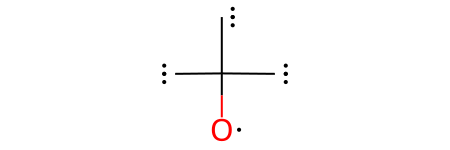

In [33]:
molsuppl[711]

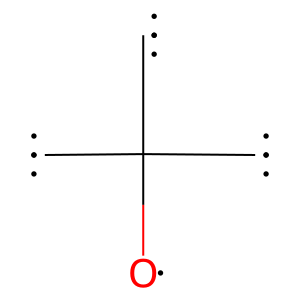

In [37]:
Chem.Draw.MolToImage(molsuppl[711])

In [31]:
little_mols

array([  699,   701,   702,   706,   707,   708,   711,   714,   741,
         747,   784,   818,   819,   820,   821,   822,   823,   825,
         888,   906,   944,  1035,  1036,  1037,  1038,  1039,  1043,
        1184,  1185,  1186,  1187,  1195,  1244,  1245,  1246,  1258,
        1398,  1511,  1515,  1586,  2131,  2132,  2133,  2134,  2138,
        2139,  2144,  2401,  2459,  2460,  3072,  3073,  3270,  3277,
        3278,  3279,  3280,  3281,  3282,  3283,  3284,  3285,  3286,
        3287,  3288,  3289,  3324,  3366,  3368,  3371,  3379,  3401,
        3408,  3448,  3535,  3537,  3545,  3547,  3556,  3557,  3558,
        3559,  3565,  3566,  3577,  3637,  3666,  3671,  3672,  3673,
        3675,  3690,  3781,  3808,  3809,  3842,  3858,  3873,  3875,
        3890,  3981,  4031,  4056,  4061,  4076,  4119,  4123,  4178,
        4223,  4262,  4325,  4339,  4340,  4341,  4343,  4345,  4346,
        4370,  4374,  4375,  4376,  4423,  4424,  4425,  4426,  4427,
        4428,  4429,

In [10]:
little_idx

array([  685,   686,   728,   790,   794,   795,   796,   856,   978,
         979,   981,   983,  1072,  1074,  1075,  1132,  1403,  2289,
        2347,  3157,  3164,  3165,  3166,  3167,  3168,  3169,  3170,
        3171,  3174,  3211,  3255,  3335,  3420,  3430,  3443,  3448,
        3459,  3519,  3555,  3691,  3753,  3938,  3986,  4041,  4198,
        4200,  4201,  4225,  4229,  4277,  4278,  4279,  4280,  4281,
        4301,  4317,  4343,  4344,  4345,  4346,  4353,  4355,  4451,
        4452,  4453,  4454,  4456,  4457,  4460,  4512,  4760,  4814,
        4822,  4836,  4837,  4838,  4840,  4873,  4946,  4947,  4953,
        4972,  4974,  4976,  4977,  4990,  4991,  4996,  5011,  5012,
        5016,  5017,  5018,  5042,  5044,  5084,  5085,  5086,  5087,
        5090,  5091,  5152,  5211,  5219,  5241,  5252,  5255,  5256,
        5257,  5259,  5276,  5334,  5369,  5370,  5388,  5389,  5398,
        5399,  5400,  5404,  5427,  5428,  5436,  5437,  7251,  7252,
        7253,  7628,

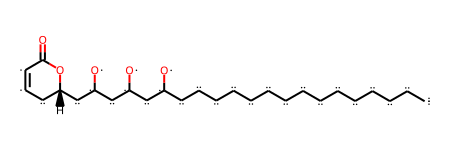

In [11]:
molsuppl[685]

In [48]:
print(np.max(n_shifts_list))
print(np.min(n_shifts_list))
print(len(n_shifts_list))
print(np.mean(n_shifts_list))

67
1
17072
7.341143392689784


In [30]:
print(np.max(n_node_list))
print(np.min(n_node_list))
print(len(n_node_list))
print(np.mean(n_node_list))
print(np.max(n_heavy_node_list))
print(np.min(n_heavy_node_list))
print(len(n_heavy_node_list))
print(np.mean(n_heavy_node_list))

147
1
17072
21.147082942830366
144
1
17072
20.525128865979383


In [23]:
print(np.max(n_node_list))
print(np.min(n_node_list))
print(len(n_node_list))
#print(np.max(n_heavy_node_list))
#print(np.min(n_heavy_node_list))
print(len(n_heavy_node_list))

171
1
32609
0


In [28]:
mol = molsuppl[3]
print(mol.GetNumAtoms())

21


In [29]:
mol_hrm = Chem.RemoveHs(mol)
print(mol.GetNumAtoms())
print(mol_hrm.GetNumAtoms())

21
20
